<a href="https://colab.research.google.com/github/CristianCosci/LAB_MachineLearning_course/blob/main/decisionTrees_KNN_NBayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

iris.csv
https://gist.github.com/netj/8836201



---


 **DecisionTree Classification with Multiple Labels using Scikit-learn**


---



In [ ]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier

**Loading data**

In [ ]:
#TO DO
iris = datasets.load_iris()
print(type(iris))
print(iris)

**Exploring the data**

In [ ]:
print(iris.data.shape)
print(iris.target_names)
print(iris.feature_names)
print(iris.target)

**Splitting the data**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=6)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

**Model Generation**

In [ ]:
dt = DecisionTreeClassifier()
dt = dt.fit(X_train, y_train)

**Model visualization**

In [ ]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(dt,
            out_file =  dot_data,
            feature_names = list(iris.feature_names),
            class_names = iris.target_names,
            filled = True,
            rounded = True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('my_Tree_4.png')
Image(graph.create_png())
#Evenly distributed would be 1 – (1/# Classes).
#max_gini = 1- (1/len(iris.target_names))
#print(max_gini)

**Making predictions**

In [ ]:
# Making a Prediction On a New Sample
sample_one_pred = dt.predict(X_test[0:2, :])

#print(X_test[0:2,:])
#print(sample_one_pred)

print(f"The first sample most likely belongs to the {iris.target_names[sample_one_pred]} iris class.")

sample_two_pred = dt.predict([[1.5, 2, 1.1, 0.6]])
#print(sample_two_pred)
print(f"The second sample most likely belongs to the {iris.target_names[sample_two_pred]} iris class.")

#predict probability
sample_three_pred = dt.predict_proba(X_test[0:2, :])
print(sample_three_pred)

**Model evalution: accuracy**
TO DO:
how to evaluate?what is accuracy?

In [ ]:
#Model Accuracy

#Predict the response for test dataset
y_pred = dt.predict(X_test)
print("accuracy on test: ", metrics.accuracy_score(y_test, y_pred))
#Predict the response for train dataset
y_pred = dt.predict(X_train)
print("accuracy on train: ", metrics.accuracy_score(y_train, y_pred))

**Cross-validation**

In [ ]:
from sklearn.model_selection import cross_val_score

cross_validation_score = cross_val_score(dt, iris.data, iris.target, cv=10)
print(cross_validation_score)

**Confusion matrix and classification report**
explain confusion matrix from documentation

In [ ]:
from sklearn.metrics import confusion_matrix

y_pred = dt.predict(X_test)

confusion_matrix(y_test, y_pred)


**Plotting the confusion matrix**

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
# Plot non-normalized confusion matrix
class_names = iris.target_names
title = "confusion matrix"
#for title, normalize in titles_options:
disp = plot_confusion_matrix(dt, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=None) #normalize =None
disp.ax_.set_title(title)

print(title)
print(disp.confusion_matrix)

plt.show()

**KNN classifier**

**Exploring the WINE dataset**

In [ ]:
wine = datasets.load_wine()

print(wine.feature_names)
# print the label species(class_0, class_1, class_2)
print(wine.target_names)

# print(wine.data)

In [ ]:
# Print the wine data (first 5 records)and get min and max values
print(wine.data[0:2])
# Print the min and max attribute value
print("min: ", np.min(wine.data))
print("max: ", np.max(wine.data))

# print data(feature)shape
print(wine.data.shape)
# print target(or label)shape
print(wine.target.shape)

**Splitting the data**

In [ ]:
# Split dataset into training set and test set
X_ref, X_test, y_ref, y_test = train_test_split(wine.data, wine.target, test_size=0.3, random_state=6)
print(X_ref.shape, X_test.shape, y_ref.shape, y_test.shape)

In [ ]:
# Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

# Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Prepare the model using the reference set
knn = knn.fit(X_ref, y_ref)

# Predict the response for test dataset
y_pred = knn.predict(X_test)
print(y_pred)

**Making predictions**

In [ ]:
new_wine = [[1,2,3,1,1,4,2,3,4,5,6,7,2]]
y_predict = knn.predict(new_wine)
print(y_predict)

y_predict_proba = knn.predict_proba(new_wine)
print(y_predict_proba)

classes= {0:"class_1", 1: "class_2", 2:"class_3"}
print(classes[y_predict[0]])

y_predict = knn.predict(X_test[:5])
print(y_predict)

**Model evaluation**

In [ ]:
# Predict the response for test dataset
y_pred = knn.predict(X_test)
print(y_pred)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

**Another KNN classifier**

In [ ]:
# Create another KNN Classifier with different n_neighbors
knn_second = KNeighborsClassifier(n_neighbors=3)

# Train the model using the training sets
knn_second = knn_second.fit(X_ref, y_ref)

# Predict the response for test dataset
y_pred_second = knn_second.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",  metrics.accuracy_score(y_test, y_pred_second))

**Creating various classifiers with different k values and plot the accuracy**

In [ ]:
import matplotlib.pyplot as plt

def find_best_k_value(data_ref, label_ref, data_test, label_test, max_k):
  score_list = []
  for k in range(1, max_k):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn = knn.fit(data_ref, label_ref)
    y_pred = knn.predict(data_test)
    score_list.append(metrics.accuracy_score(label_test, y_pred))
  
  plt.plot(range(1, max_k), score_list)
  plt.xlabel('values of k for KNN')
  plt.ylabel('testing accuracy values')

In [ ]:
# Call find_best_k_values function
find_best_k_value(X_ref, y_ref, X_test, y_test, max_k=26)

In [ ]:
# Recall min and max attribute values
print(np.max(wine.data, axis = 0))
print(np.min(wine.data, axis = 0))

In [ ]:
# NORMALIZATION
from sklearn.preprocessing import MinMaxScaler

minmax = MinMaxScaler()
data_min_max = minmax.fit_transform(wine.data)


print(data_min_max)
print(np.max(data_min_max, axis = 0))
print(np.min(data_min_max, axis = 0))

In [ ]:
# STANDARDIZATION
from sklearn.preprocessing import StandardScaler

scaledData = StandardScaler().fit_transform(wine.data)

# Printing the data
print(scaledData)
print(np.max(scaledData, axis = 0))
print(np.min(scaledData, axis = 0))

In [ ]:
# NORMALIZATION
X_ref_MM, X_test_MM, y_ref_MM, y_test_MM = train_test_split(data_min_max, wine.target, test_size=0.3, random_state=6)

find_best_k_value(X_ref_MM,y_ref_MM, X_test_MM, y_test_MM, max_k=26)

In [ ]:
# STANDARDIZATION
X_ref_MM, X_test_MM, y_ref_MM, y_test_MM = train_test_split(scaledData, wine.target, test_size=0.3, random_state=6)

find_best_k_value(X_ref_MM,y_ref_MM, X_test_MM, y_test_MM, max_k=26)

**Model evalution: other metrics**

**Precision score**:       
   P = $ \frac{T_p}{T_p + F_p}$, 
where $T_p$ is the number of true positives and $F_p$ the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.

**Recall score**:    
R = $ \frac{T_p}{T_p + F_n}$, 
where $T_p$ is the number of true positives and $F_n$ the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

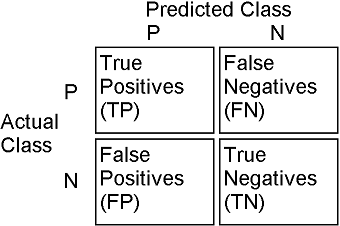


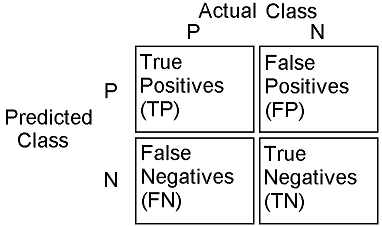

In [ ]:
y_pred = knn.predict(X_test)

# Compute the recall score
from sklearn.metrics import recall_score, precision_score  #weighted vs macro
macro_recall = recall_score(y_test, y_pred, average='macro')
print('Macro recall score: {0:0.2f}'.format(macro_recall))

w_recall = recall_score(y_test, y_pred, average='weighted')
print('weighted recall score: {0:0.2f}'.format(w_recall))

# Compute the precision score
w_precision = precision_score(y_test, y_pred, average='macro')
print('Macro precision score: {0:0.2f}'.format(w_precision))

macro_precision = recall_score(y_test, y_pred, average='weighted')
print('weighted precision score: {0:0.2f}'.format(macro_precision))

In [ ]:
from sklearn.metrics import  confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.metrics import plot_confusion_matrix
# # Plot non-normalized confusion matrix
# class_names = wine.target_names
# title = "Normalized confusion matrix"
# #for title, normalize in titles_options:
# disp = plot_confusion_matrix(knn, X_test, y_test,
#                                  display_labels=class_names,
#                                  cmap=plt.cm.Blues,
#                                  normalize="true")
# disp.ax_.set_title(title)

# print(title)
# print(disp.confusion_matrix)

# plt.show()

**Naive Bayes**

In [ ]:
iris = datasets.load_iris()
#print(iris.data)

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=109) # 70% training and 30% test

**Model creation**

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Create a Gaussian Classifier
gnb = GaussianNB()

# Train the model using the training sets
gnb = gnb.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = gnb.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

In [ ]:
from sklearn.naive_bayes import BernoulliNB

# Create a Bernoulli Classifier
bNB = BernoulliNB(binarize = 1.5)

# Train the model using the training sets
bNB = bNB.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = bNB.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

In [ ]:
from sklearn.metrics import recall_score, precision_score, classification_report, precision_recall_fscore_support
y_pred = gnb.predict(X_test)
y_score = gnb.score(X_test, y_test)
print('Accuracy: ', y_score)

# class_report = classification_report(y_test, y_pred, target_names=iris.target_names, digits=4)
# print(class_report)

precision, recall, fscore, support = precision_recall_fscore_support(y_test,y_pred,average=None)
print('Precision : {}'.format(precision))
print('Recall    : {}'.format(recall))
print('F-score   : {}'.format(fscore))
print('Support   : {}'.format(support))

# Per class_precision and per_class_recall
per_class_precision = precision_score(y_test, y_pred, average=None)
print('Per-class precision score:', per_class_precision)

per_class_recall = recall_score(y_test, y_pred, average=None)
print('Per-class recall score:', per_class_recall)

# Compute the average recall score and average precision score

w_recall = recall_score(y_test, y_pred, average='weighted')
print('weighted-averaged recall score: {0:0.2f}'.format(w_recall))

macro_recall = recall_score(y_test, y_pred, average='macro')
print('Macro-averaged recall score: {0:0.2f}'.format(macro_recall))

macro_precision = precision_score(y_test, y_pred, average='macro')
print('Macro-averaged precision score: {0:0.2f}'.format(macro_precision))

w_precision = precision_score(y_test, y_pred, average='weighted')
print('weighted-averaged precision score: {0:0.2f}'.format(w_precision))

# Further investigation of the classifier : how? 
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()

In [ ]:
# Plot the decision boundary 
from sklearn.naive_bayes import GaussianNB

# Create a Gaussian Classifier
gnb = GaussianNB()

# Train the model using the training sets
gnb = gnb.fit(X_train[:, 2:4], y_train)

from mlxtend.plotting import plot_decision_regions
# Plotting decision region

plot_decision_regions(X_train[:, 2:4], y_train, clf = gnb, legend = 2)
plt.xlabel('Petal length') # Adding axes annotations
plt.ylabel('Petal width')
plt.title('GaussianNB')